### INTRODUCTION

#### Predicting the customer churn mainly through logistic regression
#### churn class was classified into two categories  No(0) and Yes(1)
#### Steps taken in preprocessing includes Data cleaning, Standardization etc
#### Other models where used to compare accuracy

### SIDE NOTE
#### You can leave your question about any unclear part in the comment section
#### Any correction will be highly welcomed

### LOADING THE DATAFRAME

In [1]:
#Import the neccesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
sns.set()

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [2]:
path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'

df = pd.read_csv(path)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3898-GUYTS,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


#### DATA CLEANING

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

#### This data is clean but on further analysis TotalCharges includes some empty value which we will replace with 0

In [6]:
#Value count of the column
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
19.65      8
19.9       8
          ..
613.95     1
3870       1
674.55     1
2748.7     1
1266.1     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
#Replacing the empty value with zero 
df['TotalCharges'].replace(' ', 0, inplace = True)

In [8]:
df[df['TotalCharges'].apply (lambda x: x== ' ')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [9]:
#Changing the column datatype to float
df['TotalCharges'] = df['TotalCharges'].astype('float')

### DATASET ANALYSIS AND OUTLIERS REMOVAL

#### we will plot the distribution of all the numeric variables in other to be able to identify outliers and any other abnormalities
#### Outliers will be dealt with by removing either top 1% or the bottom 1%


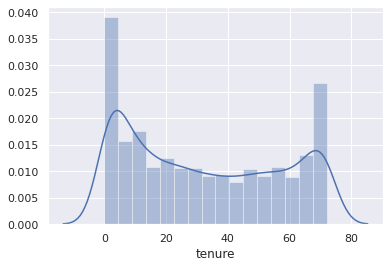

In [10]:
sns.distplot(df['tenure']) #This distribution plot appears to be normal with no outlier

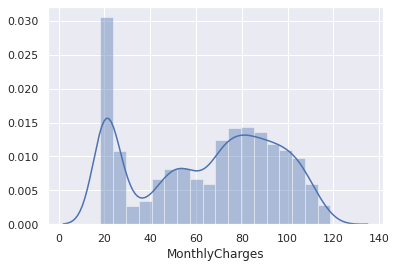

In [11]:
sns.distplot(df['MonthlyCharges']) #This distribution plot appears to be normal with no outlier

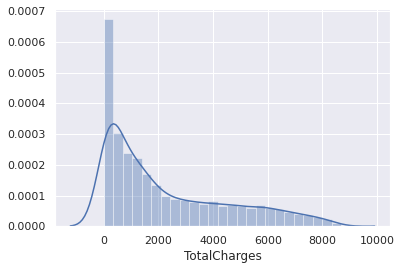

In [12]:
sns.distplot(df['TotalCharges'])#This distribution plot appears to be having a few outliers. Let's explore it further

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [14]:
#Selecting Totalcharges above 8500 to see if they are outliers
df[df['TotalCharges'].apply (lambda x: x > 8500)]
#Upon further exploration they are not outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2187,8879-XUAHX,Male,0,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,116.25,8564.75,No
2368,6650-BWFRT,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),117.15,8529.50,No
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.80,8684.80,Yes
5347,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.95,8594.40,No
5558,0675-NCDYU,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),116.40,8543.25,No
6118,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6768,9739-JLPQJ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),117.50,8670.10,No


### CHECKING OLS ASSUMPTIONS

#### Let's check that our dataset are not violating any of this assumptions which includes:
#### 1. No Endogeneity
#### 2. Normality and Homoscedasticity
#### 3.No Autocorrelation
#### 4.NO multicollinearity: making sure our independents variables are not strongly related(correlated) with each other

####  We are not violating  assumptions 1 through 3 but for NO multicollinearity we need to check

In [15]:
#Getting Variables in our dataframe
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# the target column (in this case 'churn') should not be included in variables
#Categorical variables already turned into dummy indicator may or maynot be added if any
variable = df[['tenure', 'MonthlyCharges','TotalCharges',]]
X = add_constant(variable)
vif = pd.DataFrame()
vif['VIF']  = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['features'] = X.columns

vif
#Using 10 as the minimum vif values i.e any independent variable 10 and above will have to be dropped
#From the results all independent variable are below 10

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,VIF,features
0,14.899868,const
1,5.836728,tenure
2,3.216730,MonthlyCharges
3,9.510931,TotalCharges


### Standardization

#### Standardizing helps to give our independent varibles a more standard and relatable numeric scale, it also helps in improving model accuracy
#### We are going to standardize only our numerical variables then use new columns to hold the resulting values

In [17]:
#Selecting the variable
scale_int = df[['MonthlyCharges']]

scaler = StandardScaler()#Selecting the standardscaler
scaler.fit(scale_int)#fitting our independent variables

StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
df['scaled_monthly']= scaler.transform(scale_int)#scaling

In [19]:
scale_int = df[['tenure']] #Selecting the variable

scaler = StandardScaler()#Selecting the standardscaler
scaler.fit(scale_int)#fitting our independent variables

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
df['scaled_tenure']= scaler.transform(scale_int)#scaling

In [21]:
scale_int = df[['tenure']] #Selecting the variable

scaler = StandardScaler()#Selecting the standardscaler
scaler.fit(scale_int)#fitting our independent variables

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
df['scaled_charges']= scaler.transform(scale_int)#scaling

In [23]:
df.describe()# Checking our scaled results

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,scaled_monthly,scaled_tenure,scaled_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03
mean,0.162147,32.371149,64.761692,2279.734304,-8.291599e-17,5.945991e-17,5.945991e-17
std,0.368612,24.559481,30.090047,2266.794470,1.000071e+00,1.000071e+00,1.000071e+00
min,0.000000,0.000000,18.250000,0.000000,-1.545860e+00,-1.318165e+00,-1.318165e+00
25%,0.000000,9.000000,35.500000,398.550000,-9.725399e-01,-9.516817e-01,-9.516817e-01
50%,0.000000,29.000000,70.350000,1394.550000,1.857327e-01,-1.372744e-01,-1.372744e-01
75%,0.000000,55.000000,89.850000,3786.600000,8.338335e-01,9.214551e-01,9.214551e-01
max,1.000000,72.000000,118.750000,8684.800000,1.794352e+00,1.613701e+00,1.613701e+00


In [24]:
df.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,scaled_monthly,scaled_tenure,scaled_charges
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043.000000,7043.000000,7043,7.043000e+03,7.043000e+03,7.043000e+03
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,2,4,NaN,NaN,2,NaN,NaN,NaN
top,3898-GUYTS,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,NaN,NaN,No,NaN,NaN,NaN
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,2785,3875,4171,2365,NaN,NaN,5174,NaN,NaN,NaN
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64.761692,2279.734304,NaN,-8.291599e-17,5.945991e-17,5.945991e-17
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.090047,2266.794470,NaN,1.000071e+00,1.000071e+00,1.000071e+00
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.250000,0.000000,NaN,-1.545860e+00,-1.318165e+00,-1.318165e+00
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,35.500000,398.550000,NaN,-9.725399e-01,-9.516817e-01,-9.516817e-01
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,70.350000,1394.550000,NaN,1.857327e-01,-1.372744e-01,-1.372744e-01
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN,8.338335e-01,9.214551e-01,9.214551e-01


In [25]:
#Dropping columns not needed
df.drop(['tenure','MonthlyCharges','customerID', 'TotalCharges'], axis = 1, inplace = True)

### Dummy Variables
#### churn is a categorical variable so we need  to turn it into a dummy indicator before we can perform our regression
#### For other categorical variable we will use get_dummies

In [26]:
#Turning Churn to a dummy indicator with 1 standing yes and 0 standing for no
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [27]:
#Variables in our dataframe
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'scaled_monthly', 'scaled_tenure', 'scaled_charges'],
      dtype=object)

In [28]:
#new dataframe with dummies
df_dummies = pd.get_dummies(df, drop_first = True)

df_dummies

,SeniorCitizen,Churn,scaled_monthly,scaled_tenure,scaled_charges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,-1.160323,-1.277445,-1.277445,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,0,-0.259629,0.066327,0.066327,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,-0.362660,-1.236724,-1.236724,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,-0.746535,0.514251,0.514251,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0.197365,-1.236724,-1.236724,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0.665992,-0.340876,-0.340876,1,1,1,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,0,1.277533,1.613701,1.613701,0,1,1,1,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,0,-1.168632,-0.870241,-0.870241,0,1,1,0,1,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,0.320338,-1.155283,-1.155283,1,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1


### LOGISTIC REGRESSION

In [29]:
#Declaring independent variable i.e x
#Declaring Target variable i.e y
x = df_dummies.drop('Churn', axis = 1)
y = df_dummies['Churn']

In [30]:
#Splitting our data into train and test dataframe
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 24)

In [31]:
reg = LogisticRegression() #Selecting the model
reg.fit(x_train, y_train) #training the model with x_train and y_train

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#Predicting with our already trained model using x_test
y_hat = reg.predict(x_test)

In [33]:
#Getting the accuracy of our model
acc = metrics.accuracy_score(y_hat, y_test)
acc

0.8176011355571328

In [34]:
#The intercept for our regression
reg.intercept_

array([-1.47895973])

In [35]:
#Coefficient for all our variables
reg.coef_

array([[ 0.15952569,  0.06204254, -0.39399346, -0.39399346, -0.03496807,
         0.02418513, -0.14122176, -0.25552602,  0.25675579,  0.26869272,
         0.89291879, -0.11809879, -0.11809879, -0.37693058, -0.11809879,
        -0.15602351, -0.11809879,  0.01486297, -0.11809879, -0.36955555,
        -0.11809879,  0.18477857, -0.11809879,  0.19383036, -0.64733949,
        -1.41170021,  0.37831782, -0.08226529,  0.3408593 ,  0.07990828]])

### CONFUSION MATRIX

In [36]:
cm = confusion_matrix(y_hat,y_test)
cm

array([[954, 154],
       [103, 198]])

In [37]:
# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,954,154
Actual 1,103,198


#### Our model predicted '0' correctly 954 times while  predicting '0' incorrectly 154 times
#### Also it predicted  '1'  correctly 198 times while predicting '1' incorrectly  103

### OTHER MODELS

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
from sklearn import svm #for Support Vector Machine (SVM) 

In [39]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y1 = dt.predict(x_test)
acc1 = metrics.accuracy_score(y1, y_test)
acc1

0.7402413058907026

In [40]:
kk = KNeighborsClassifier()
kk.fit(x_train,y_train)
y2 = kk.predict(x_test)
acc2 = metrics.accuracy_score(y2, y_test)
acc2

0.7785663591199432

In [41]:
sv = svm.SVC()
sv.fit(x_train,y_train)
y3 = sv.predict(x_test)
acc3 = metrics.accuracy_score(y3, y_test)
acc3

0.8147622427253371

#### After comparison with some other model  logistic regression gave us the best accuracy with ~81.8% followed closely by svm model with ~81.7%

###  CONCLUSION
#### Let's try to make a table and with weight(BIAS) and odds 

In [42]:
result = pd.DataFrame(data = x.columns.values, columns = ['features'] )
result['weight'] = np.transpose(reg.coef_)
result['odds'] = np.exp(np.transpose(reg.coef_))

result

,features,weight,odds
0,SeniorCitizen,0.159526,1.172954
1,scaled_monthly,0.062043,1.064008
2,scaled_tenure,-0.393993,0.674358
3,scaled_charges,-0.393993,0.674358
4,gender_Male,-0.034968,0.965636
5,Partner_Yes,0.024185,1.024480
6,Dependents_Yes,-0.141222,0.868297
7,PhoneService_Yes,-0.255526,0.774509
8,MultipleLines_No phone service,0.256756,1.292729
9,MultipleLines_Yes,0.268693,1.308253
